In [1]:
import numpy as np
from math import factorial

def taylor_expansion(func_derivatives, a, x, n):
    """
    func_derivatives: list of n derivatives evaluated at a (f^(0)(a), f'(a), f''(a), ...)
    a: point of expansion
    x: array of x values
    n: number of terms
    """
    taylor = np.zeros_like(x)
    for i in range(n):
        taylor += func_derivatives[i] * (x - a)**i / factorial(i)
    return taylor


In [2]:
def get_derivatives(func_name, a, n):
    if func_name == 'exp':
        return [np.exp(a)] * n
    elif func_name == 'sin':
        cycle = [np.sin(a), np.cos(a), -np.sin(a), -np.cos(a)]
        return [cycle[i % 4] for i in range(n)]
    elif func_name == 'cos':
        cycle = [np.cos(a), -np.sin(a), -np.cos(a), np.sin(a)]
        return [cycle[i % 4] for i in range(n)]
    elif func_name == 'ln':
        return [(-1)**(i+1) / a**i if i > 0 else np.log(a) for i in range(n)]


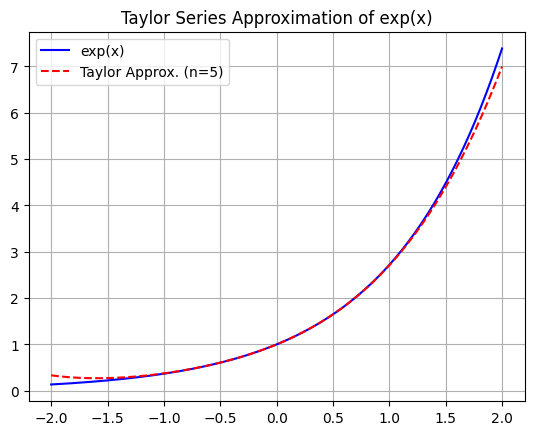

In [3]:
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 400)
a = 0  # Expansion around 0
n = 5  # Number of terms
derivatives = get_derivatives('exp', a, n)
approx = taylor_expansion(derivatives, a, x, n)

plt.plot(x, np.exp(x), label='exp(x)', color='blue')
plt.plot(x, approx, label=f'Taylor Approx. (n={n})', color='red', linestyle='--')
plt.legend()
plt.title('Taylor Series Approximation of exp(x)')
plt.grid(True)
plt.show()


In [4]:
from ipywidgets import interact

def plot_taylor(n):
    derivatives = get_derivatives('exp', a, n)
    approx = taylor_expansion(derivatives, a, x, n)
    plt.figure(figsize=(8,5))
    plt.plot(x, np.exp(x), label='exp(x)', color='blue')
    plt.plot(x, approx, label=f'Taylor Approx. (n={n})', color='red', linestyle='--')
    plt.legend()
    plt.title('Taylor Series Approximation of exp(x)')
    plt.grid(True)
    plt.show()

interact(plot_taylor, n=(1, 20))


interactive(children=(IntSlider(value=10, description='n', max=20, min=1), Output()), _dom_classes=('widget-in…

<function __main__.plot_taylor(n)>